**FINAL PROJECT CNIT483**\
Elena Gómez Espinosa\
Purdue University, 2023


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import StandardScaler

In [2]:
import random
random.seed(1)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATASET**

In [4]:
data=pd.read_csv('drive/MyDrive/CNIT483/LABS/final_project/OnlineNewsPopularity.csv') 


In [5]:
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


**DATA PREPROCESSING**

**Exploring the data**\
The dataset has 40000 observations, it is too big. So, we will take a sample of 10000 observations, because if not the computations will be very expensive.

In [6]:
data = data.iloc[:10000, :]


In [7]:
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,http://mashable.com/2013/07/16/jimmy-fallon-mi...,541.0,13.0,268.0,0.580392,1.0,0.658683,7.0,5.0,1.0,...,0.214286,1.00,-0.163690,-0.250,-0.071429,0.225000,-0.025000,0.275000,0.025000,1300
9996,http://mashable.com/2013/07/16/k-pop-youtube-g...,541.0,9.0,2096.0,0.335084,1.0,0.573724,14.0,4.0,8.0,...,0.100000,1.00,-0.289506,-0.800,-0.050000,0.000000,0.000000,0.500000,0.000000,1300
9997,http://mashable.com/2013/07/16/man-of-steel-al...,541.0,11.0,176.0,0.666667,1.0,0.772727,7.0,6.0,0.0,...,0.160000,0.25,-0.250000,-0.250,-0.250000,0.000000,0.000000,0.500000,0.000000,619
9998,http://mashable.com/2013/07/16/marissa-mayer-y...,541.0,13.0,410.0,0.492537,1.0,0.612245,2.0,2.0,1.0,...,0.033333,0.90,-0.202431,-0.300,-0.125000,0.000000,0.000000,0.500000,0.000000,830


**Missing values**

In [8]:
NAs=data.isna().sum()
NAs

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

There are not missing values, so we can continue without removing any variable or observation.

**Irrelevant variables**

In the dataset there are some irrelevant variables that are not necessary to compute the models. So, we remove them.\
Firstly, we remove “url” and “timedelta” because they are non-predictive

In [9]:
data=data.drop(['url', ' timedelta' ], axis=1)

We also remove LDA variables

In [10]:

    
data=data.drop([' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04' ], axis=1)

Finally, we will remove the variable weekend (“is_weekend”) because we already have one variable that determines if news was published on Saturday(“weekday_is_saturday”) and another one that determines if news was published on Sunday (“weekday_is_sunday”). So we do not need the variable “is_weekend”.

In [11]:
data=data.drop(' is_weekend', axis=1)

**Converting variables**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0    n_tokens_title                 10000 non-null  float64
 1    n_tokens_content               10000 non-null  float64
 2    n_unique_tokens                10000 non-null  float64
 3    n_non_stop_words               10000 non-null  float64
 4    n_non_stop_unique_tokens       10000 non-null  float64
 5    num_hrefs                      10000 non-null  float64
 6    num_self_hrefs                 10000 non-null  float64
 7    num_imgs                       10000 non-null  float64
 8    num_videos                     10000 non-null  float64
 9    average_token_length           10000 non-null  float64
 10   num_keywords                   10000 non-null  float64
 11   data_channel_is_lifestyle      10000 non-null  float64
 12   data_channel_is_entertainment  1

As it can be seen above, there are some variables that are factors, but they are considered as "float64".So we have to convert them into factors.

In [13]:
data.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_posit

In [14]:
data[' data_channel_is_bus'] = pd.Categorical(data[' data_channel_is_bus'])
data[' data_channel_is_entertainment'] = pd.Categorical(data[' data_channel_is_entertainment'])
data[' data_channel_is_lifestyle'] = pd.Categorical(data[' data_channel_is_lifestyle'])
data[' data_channel_is_socmed'] = pd.Categorical(data[' data_channel_is_socmed'])
data[' data_channel_is_tech'] = pd.Categorical(data[' data_channel_is_tech'])
data[' data_channel_is_world'] = pd.Categorical(data[' data_channel_is_world'])
data[' weekday_is_monday'] = pd.Categorical(data[' weekday_is_monday'])
data[' weekday_is_tuesday'] = pd.Categorical(data[' weekday_is_tuesday'])
data[' weekday_is_wednesday'] = pd.Categorical(data[' weekday_is_wednesday'])
data[' weekday_is_thursday'] = pd.Categorical(data[' weekday_is_thursday'])
data[' weekday_is_friday'] = pd.Categorical(data[' weekday_is_friday'])
data[' weekday_is_saturday'] = pd.Categorical(data[' weekday_is_saturday'])
data[' weekday_is_sunday'] = pd.Categorical(data[' weekday_is_sunday'])

**Creating new variables**

Now, we are going to create new variables by using the ones that we already have. The new variables we create consits on transforming the target, which is a numerical variable, into a categorical one. Because we will need this variables to be categorical to train the classification models.\
We determine if the popularity of news is "popular" or "unpopular" depending of the number of shares they have.\
 We consider that an article is popular if it has equal or less shares than the median of shares and it is unpopular if it has more shares than the median of shares.


In [15]:
med=np.median(data[' shares'])

In [16]:
data['popularity'] = ""


for i in range(len(data)):
    if data[' shares'][i] <= med:
        data['popularity'][i] = "unpopular"
    else:
        data['popularity'][i] = "popular"

<ipython-input-16-c9aa31d03ef6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['popularity'][i] = "unpopular"
<ipython-input-16-c9aa31d03ef6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['popularity'][i] = "popular"


**Outliers**

We are going to represent all the numerical and integers variable in different boxplots in order to know if our database has oultiers. We are going to scale the data before plotting it.

In [17]:
data_numerical=data

In [18]:
data_numerical.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_posit

In [19]:

    
data_numerical=data_numerical.drop([' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', 'popularity'], axis=1)

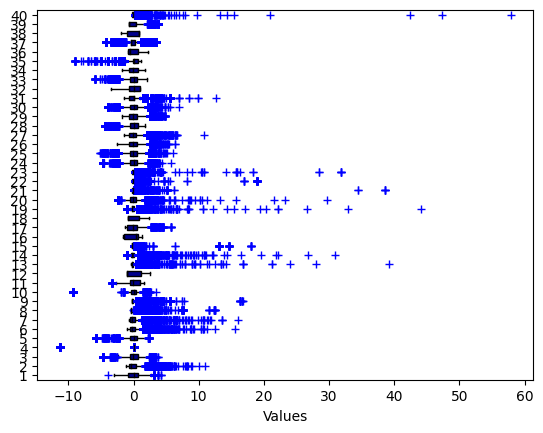

In [20]:

from sklearn.preprocessing import StandardScaler
# Scale the numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

# Create the boxplot with specified options
plt.boxplot(data_scaled, vert=False, sym='b+', widths=0.5, whis=1.5, patch_artist=True, boxprops=dict(facecolor='darkblue'), medianprops=dict(color='black'), capprops=dict(color='black'), whiskerprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='blue', marker='D'), labels=list(range(1,len(data_numerical.columns)+1)))

# Set x-axis label
plt.xlabel('Values')

# Show the plot
plt.show()

As we can see there are plenty of outliers in our database. We will plot some variables alone to see outliers better.

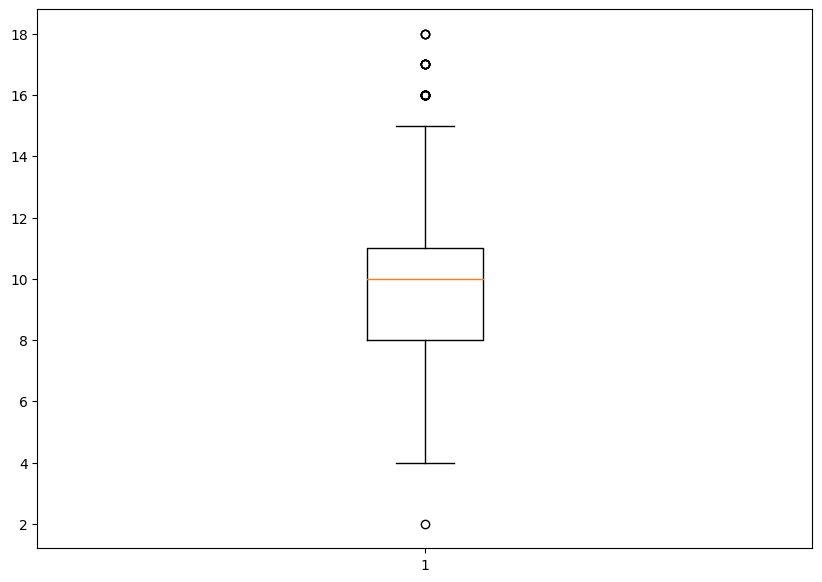

In [21]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' n_tokens_title'])
 
# show plot
plt.show()

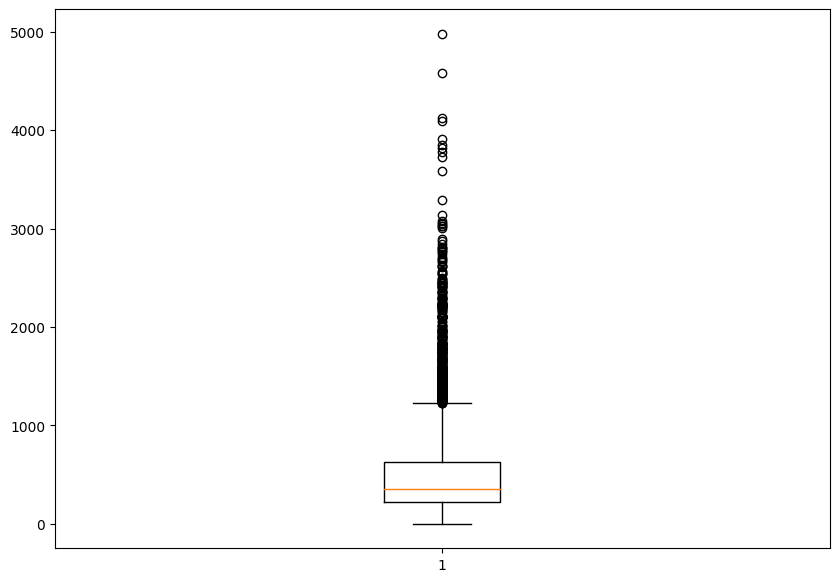

In [22]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' n_tokens_content'])
 
# show plot
plt.show()

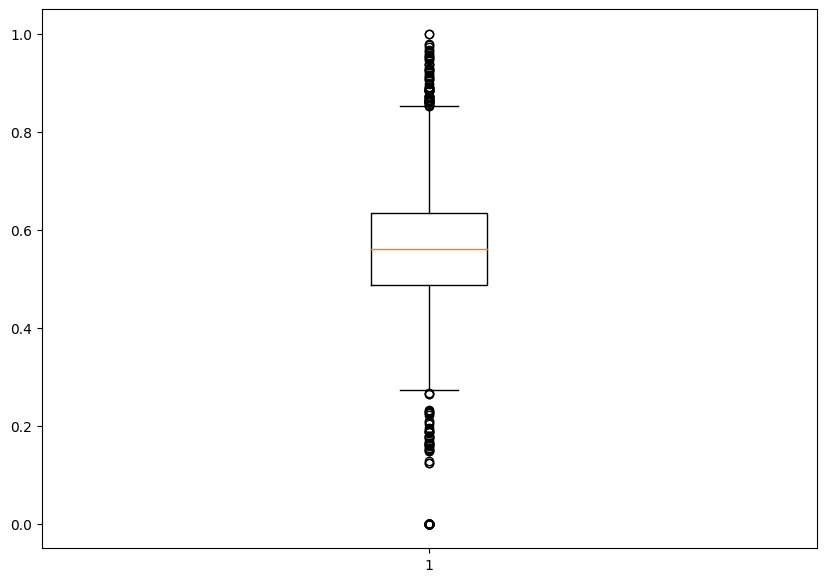

In [23]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' n_unique_tokens'])
 
# show plot
plt.show()

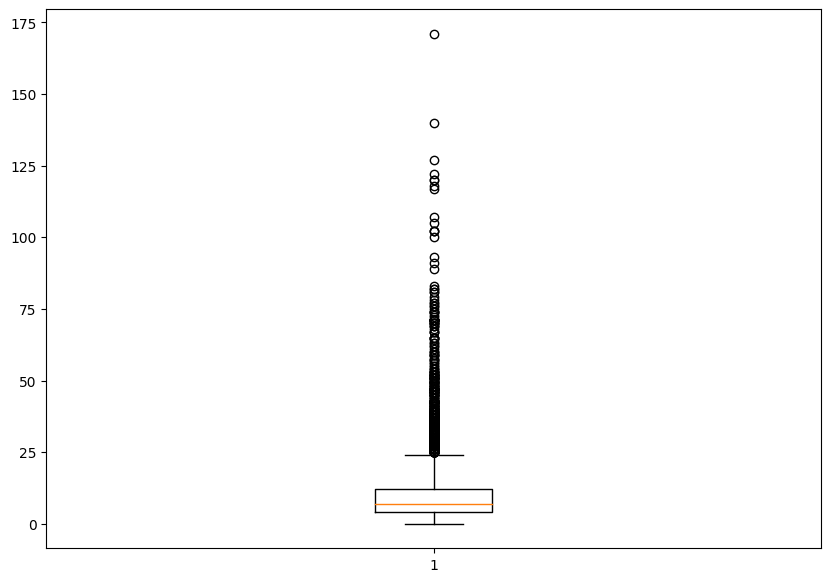

In [24]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' num_hrefs'])
 
# show plot
plt.show()

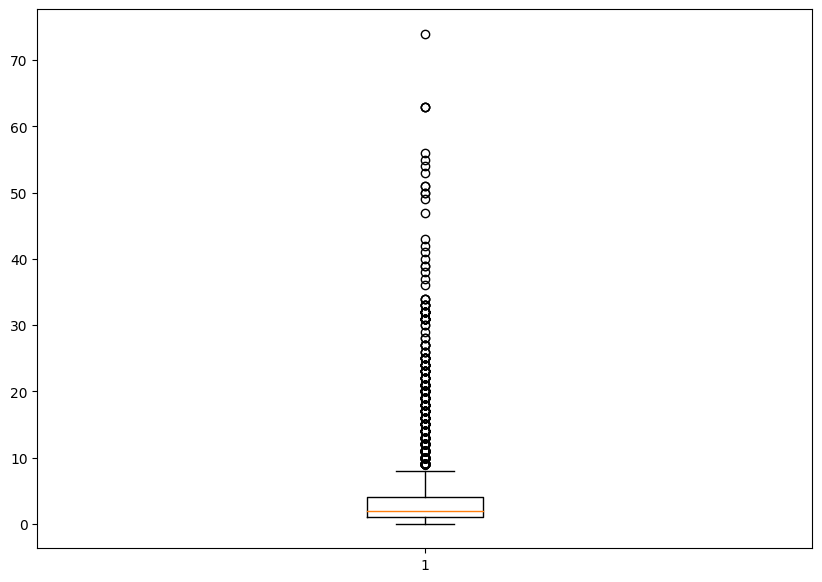

In [25]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' num_self_hrefs'])
 
# show plot
plt.show()

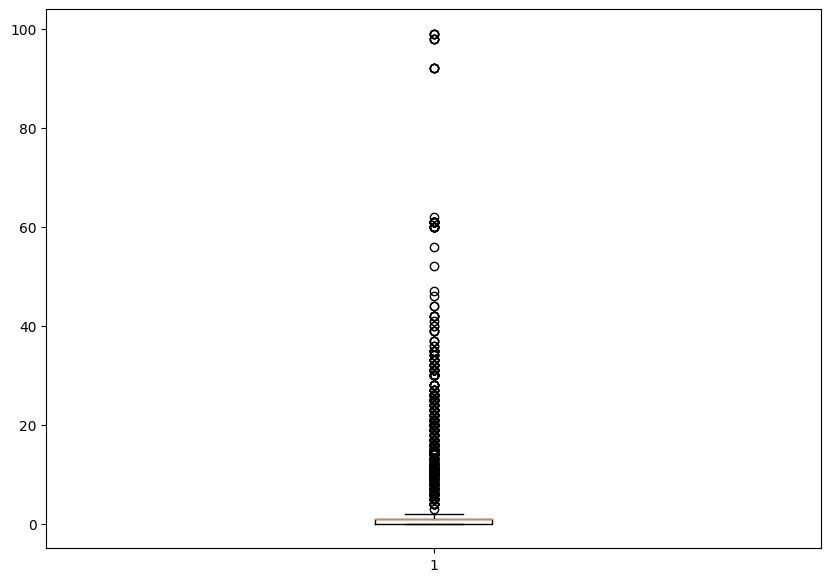

In [26]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' num_imgs'])
 
# show plot
plt.show()

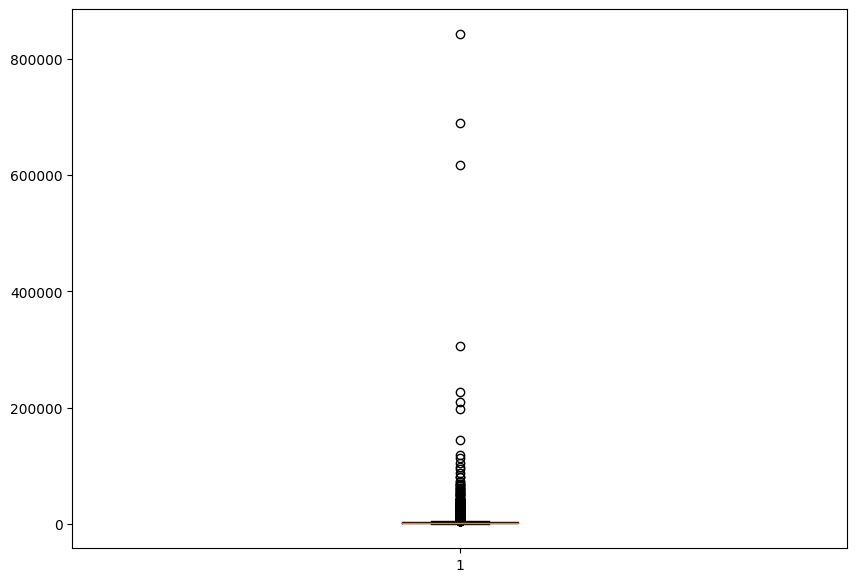

In [27]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data[' shares'])
 
# show plot
plt.show()

There are too many outliers, but I think that this occurs because the values of different observations are very different. I have decided not to remove any observation because I think that every observation will be important for the analysis.

**VISUALIZATION TOOLS**

We are going to plot some different variables in order to understand them better and to see the relationship between some variables. First of all, we are going to plot a barplot using the variable “popularity” that we have just created.

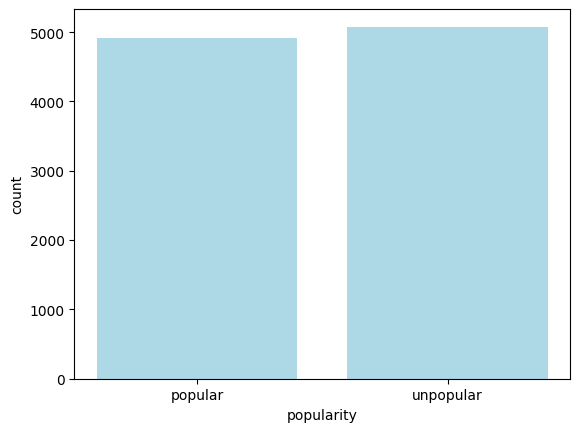

In [28]:
counts = data.groupby('popularity').size()

# Set the x-axis labels to the unique values in the 'popularity' column
x_labels = sorted(data['popularity'].unique())

# Create the bar plot with specified fill color
plt.bar(x_labels, counts, color='#ADD8E6')

# Set the x-axis label
plt.xlabel('popularity')

# Set the y-axis label
plt.ylabel('count')

# Show the plot
plt.show()

In [29]:
# Calculate the frequency table
freq_table =data['popularity'].value_counts()

# Calculate the relative frequencies
rel_freq_table = freq_table / len(data['popularity'])

# Print the relative frequency table
print(rel_freq_table)

unpopular    0.5078
popular      0.4922
Name: popularity, dtype: float64


As we can see, more less 1/2 of the articles are popular. And around 1/2 of the articles are unpopular

<ipython-input-30-ac58774050b4>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[' shares'], hist=True, kde=False,


Text(0, 0.5, 'density')

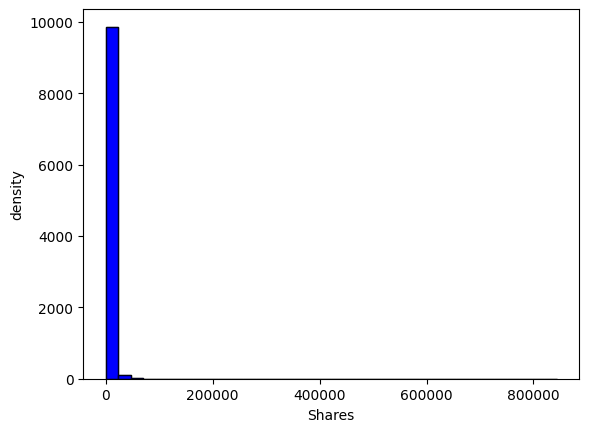

In [30]:
import seaborn as sns

# matplotlib histogram
plt.hist(data[' shares'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(data[' shares'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels

plt.xlabel('Shares')
plt.ylabel('density')

As we can see, the distribution is very skewed, so we have to apply a transformation in order to obtain a closer to a normal distribution. We will use the log.

<ipython-input-31-57ed4f0c5aa1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log2(data[' shares']), hist=True, kde=False,


Text(0, 0.5, 'density')

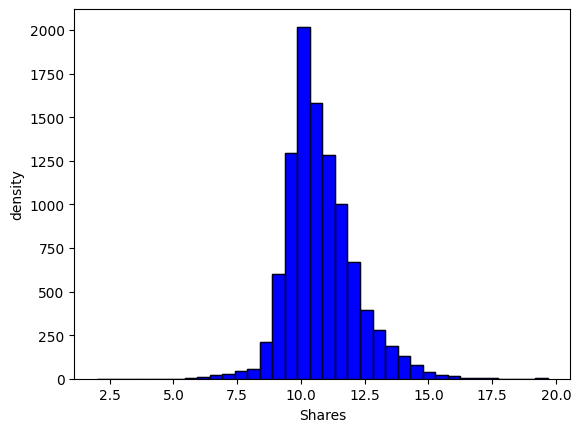

In [31]:



# matplotlib histogram
plt.hist(np.log2(data[' shares']), color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(np.log2(data[' shares']), hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels

plt.xlabel('Shares')
plt.ylabel('density')

We remove the variable “popularity” that we have created before. We have used it for visualization, later we will need, but we will create it again.

**CLASSIFICATION**

Let´s predict the class popularity, using some classification tools. Classification is the process of predicting the class of given data points. The class that is predicted is called target. In classification, we can distinguish between statistical classification and machine learning classification

To begin with, we will see the correlation between all the numerical variables. And we will remove variables with a strong correlation, because if not we will obtain collinearity errors .

<ipython-input-32-1b87e5288213>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


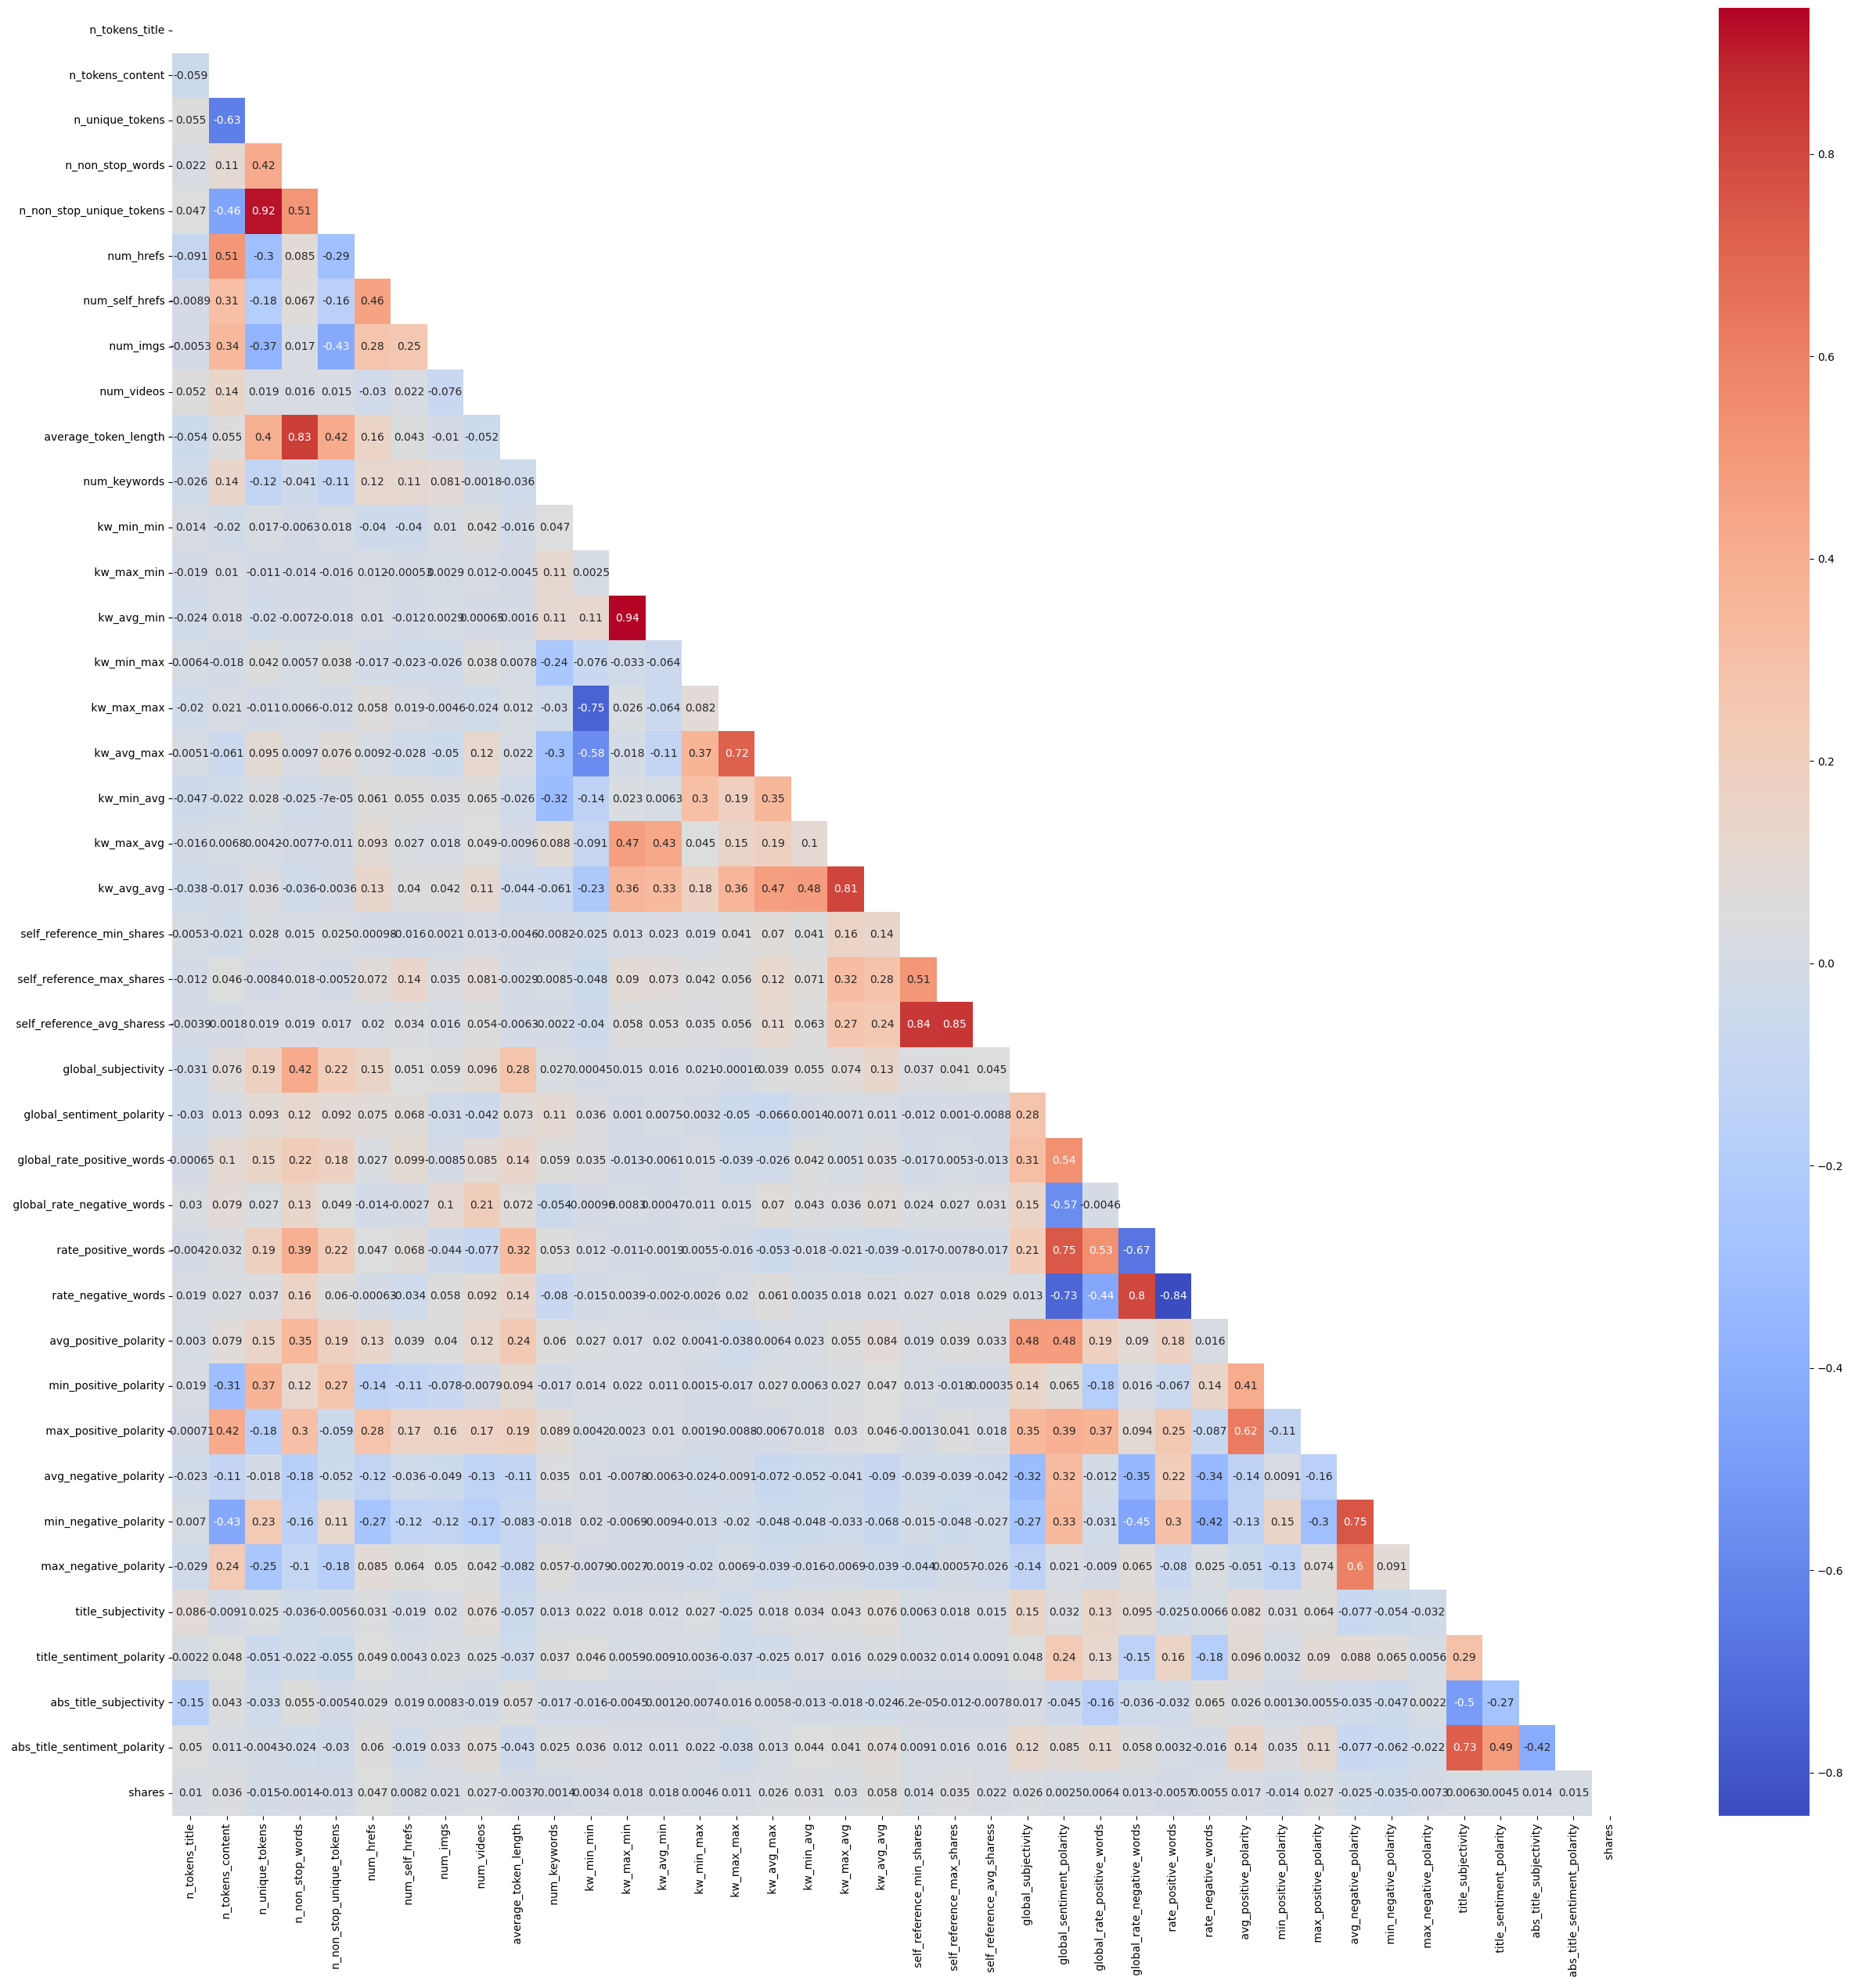

In [32]:
corr_matrix = data_numerical.corr()

# create a mask to show only the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30, 30))

# create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)

# display the plot
plt.show()

In [33]:
cols_to_remove = set()

# iterate over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        # check if the correlation coefficient is higher than 0.8
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            # add the column name to the set of columns to be removed
            colname = corr_matrix.columns[i]
            cols_to_remove.add(colname)

# remove the columns with high correlation
data_numerical = data_numerical.drop(cols_to_remove, axis=1)

# display the resulting DataFrame
print(data_numerical)

       n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0                12.0              219.0          0.663594                1.0   
1                 9.0              255.0          0.604743                1.0   
2                 9.0              211.0          0.575130                1.0   
3                 9.0              531.0          0.503788                1.0   
4                13.0             1072.0          0.415646                1.0   
...               ...                ...               ...                ...   
9995             13.0              268.0          0.580392                1.0   
9996              9.0             2096.0          0.335084                1.0   
9997             11.0              176.0          0.666667                1.0   
9998             13.0              410.0          0.492537                1.0   
9999             14.0              361.0          0.665653                1.0   

       num_hrefs   num_self

Let´s plot again the correlations, but now our database has less variables because we have removed the most correlated ones. This is not bad, because more data means more information, but also more noise, and in this way we have removed noise.

<ipython-input-34-1b87e5288213>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


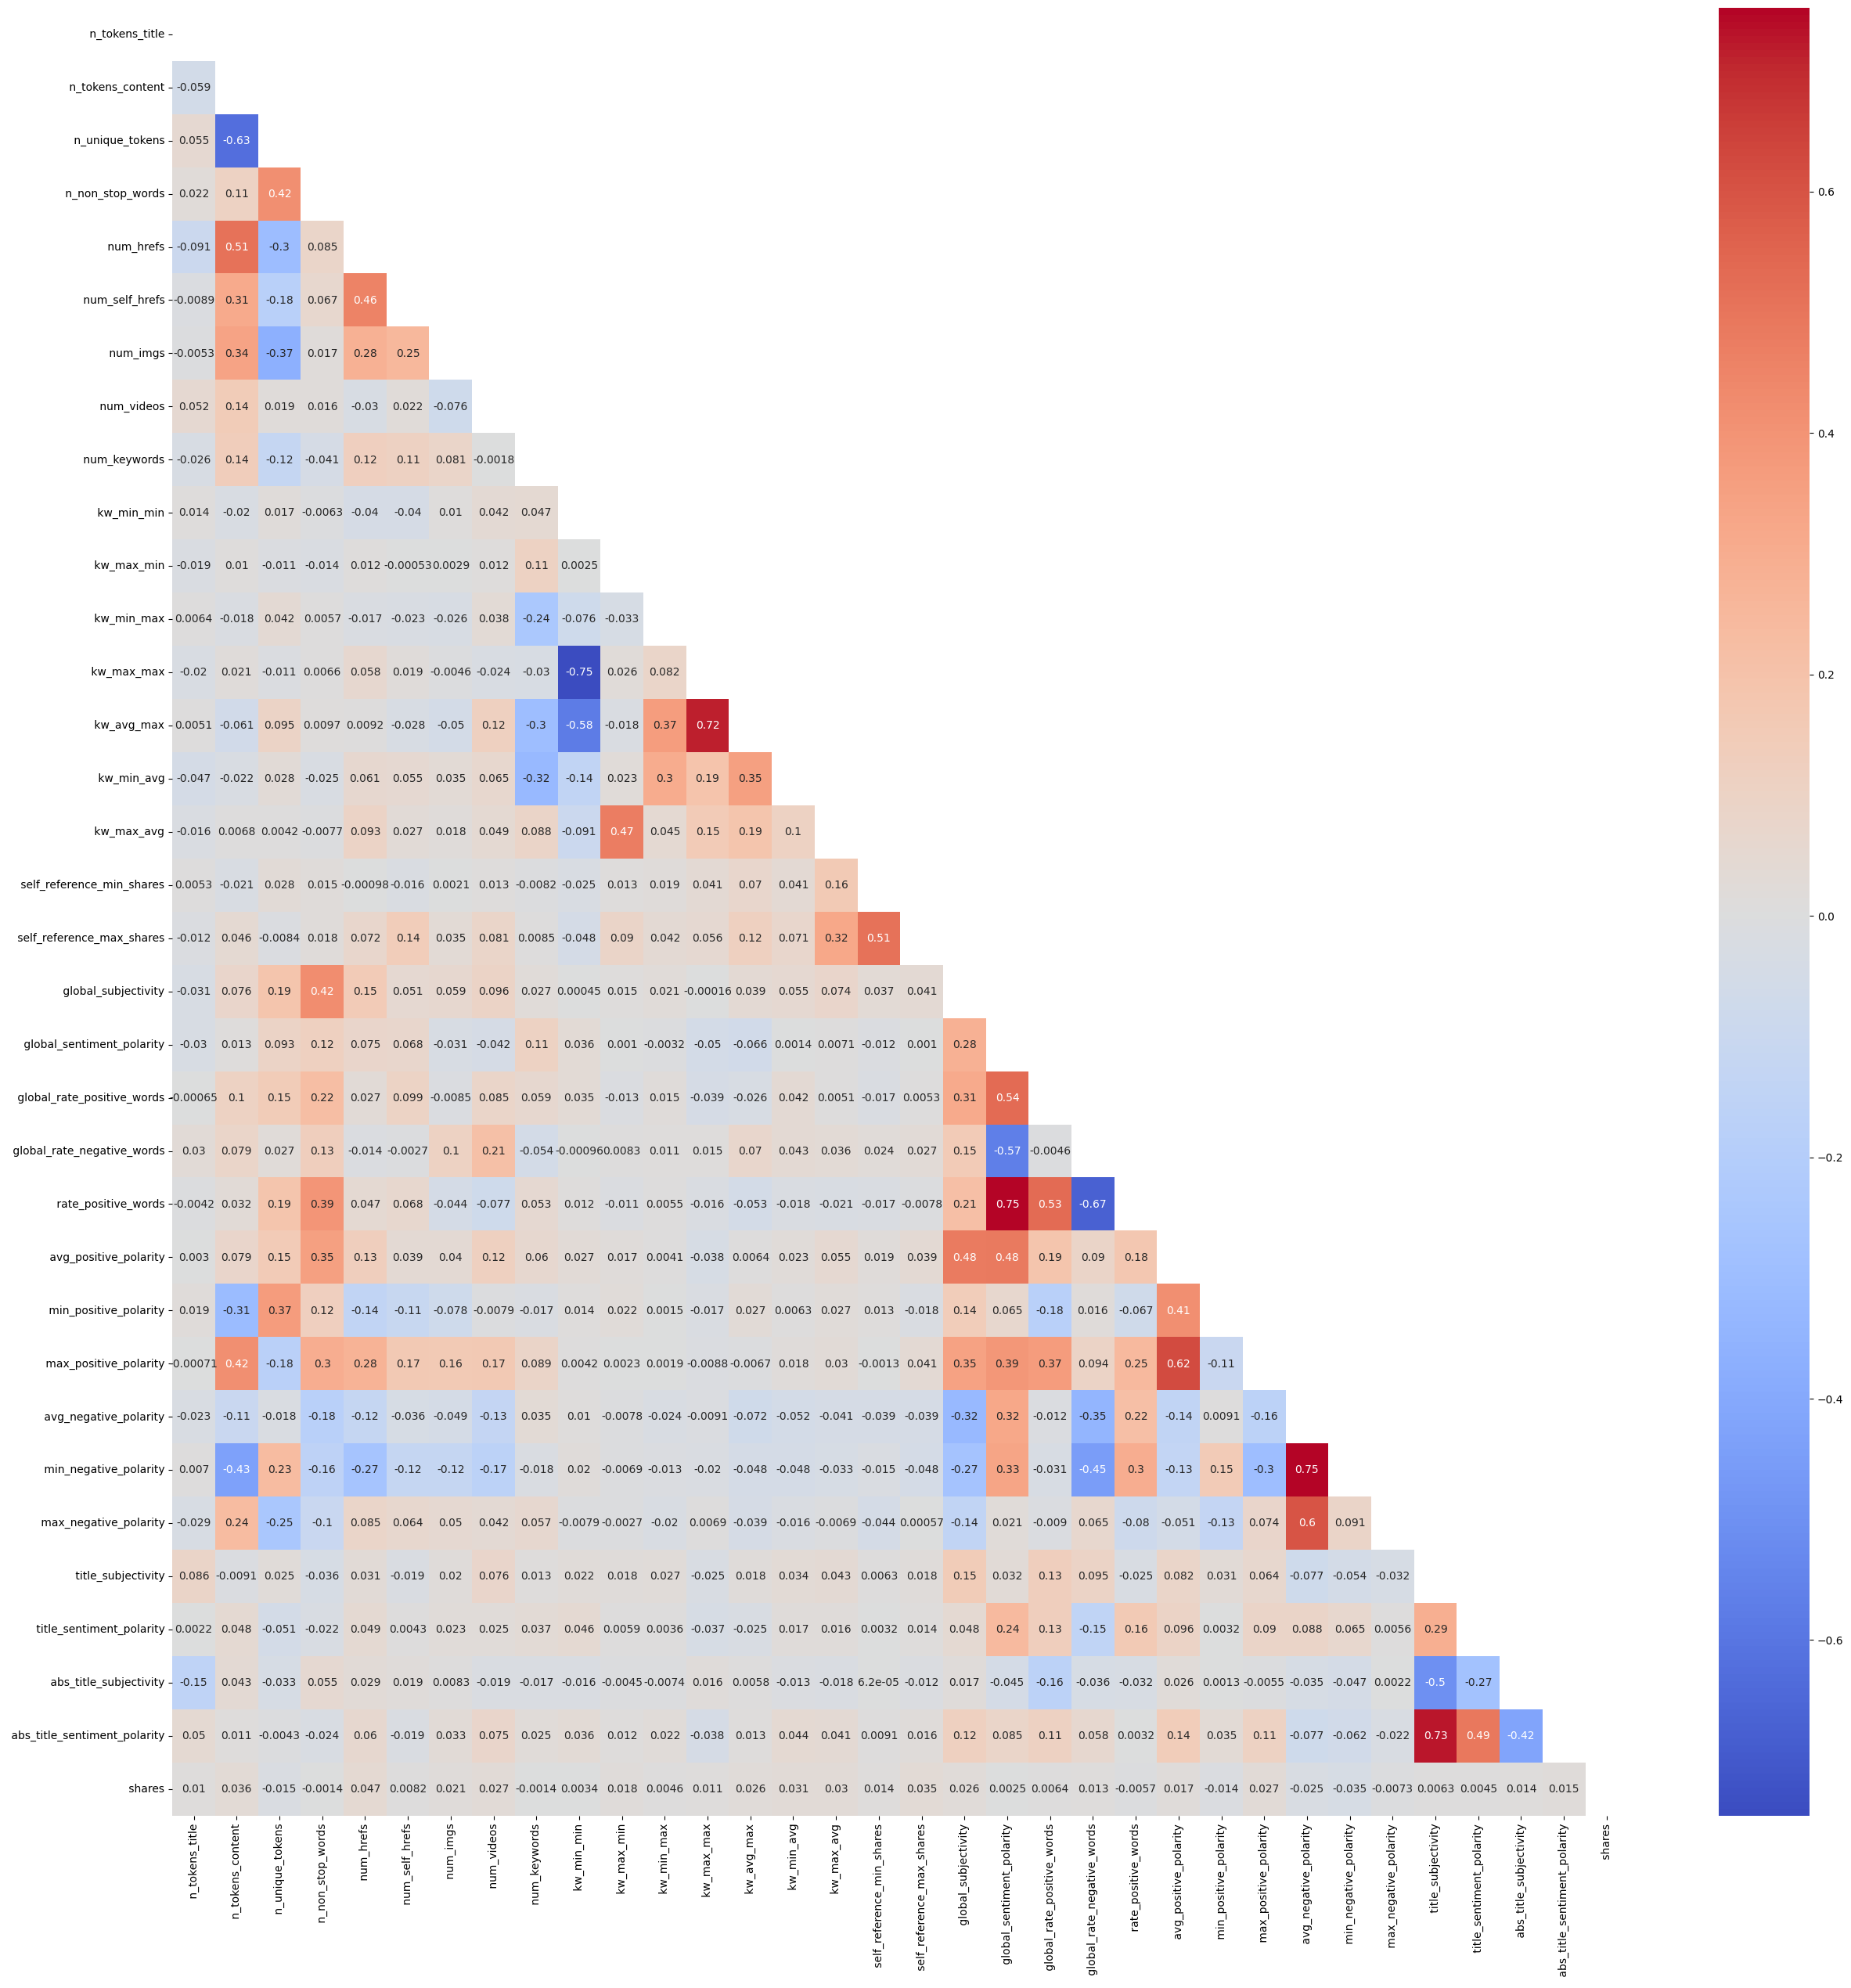

In [34]:
corr_matrix = data_numerical.corr()

# create a mask to show only the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(30, 30))

# create a heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)

# display the plot
plt.show()

In order to train classification models,we transformed a regression problem into a classification one. We distinguish 3 types of popularity by taking into account the number of shares. (This was explained before).

Let´s prepare the input\
1.we call our dataset for classification data_classification1 and we remove the correlated variables.

In [35]:
data_classification1=data

The correlated variables we have to remove are the following one.

In [36]:
cols_to_remove

{' average_token_length',
 ' kw_avg_avg',
 ' kw_avg_min',
 ' n_non_stop_unique_tokens',
 ' rate_negative_words',
 ' self_reference_avg_sharess'}

In [37]:
data_classification1=data_classification1.drop([' average_token_length',
 ' kw_avg_avg',
 ' kw_avg_min',
 ' n_non_stop_unique_tokens',
 ' rate_negative_words',
 ' self_reference_avg_sharess'], axis=1)

3.Then, we remove the original variable, the number of shares.

In [38]:
data_classification1=data_classification1.drop(' shares', axis=1)

4.Let's remove factors because if not we will get some problems when running some models.

In [39]:
data_classification1=data_classification1.drop([' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday'], axis=1)

5.Then we split into train and test.

In [40]:
random.seed(1)

# Get the total number of rows in the data
nrows =data_classification1.shape[0]

# Calculate the number of rows for the training set
nrows_train = int(nrows * 0.8)

# Randomly sample the row indices for the training set
index_train = random.sample(range(nrows), nrows_train)

# Create the training and testing sets
train_classification1 = data_classification1.iloc[index_train]
test_classification1 = data_classification1.drop(index_train)

# Print the number of rows in the training set
print(train_classification1.shape[0])
print(test_classification1.shape[0])

8000
2000


In [41]:
x_train_classification1=train_classification1.drop('popularity', axis=1)
y_train_classification1=train_classification1['popularity']
x_test_classification1=test_classification1.drop('popularity', axis=1)
y_test_classification1=test_classification1['popularity']


----------------------------------------------------------------------------------------------------------------------------


**Logistic regression**

we standardize the data

In [42]:
scaler = StandardScaler()
x_train_classification1_scaled = scaler.fit_transform(x_train_classification1)
x_test_classification1_scaled = scaler.transform(x_test_classification1)

In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=10000)

# fit the model with data
logreg.fit(x_train_classification1_scaled, y_train_classification1)

y_pred = logreg.predict(x_test_classification1_scaled)

In [44]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test_classification1, y_pred)
cnf_matrix


array([[488, 515],
       [348, 649]])

Text(0.5, 427.9555555555555, 'Predicted label')

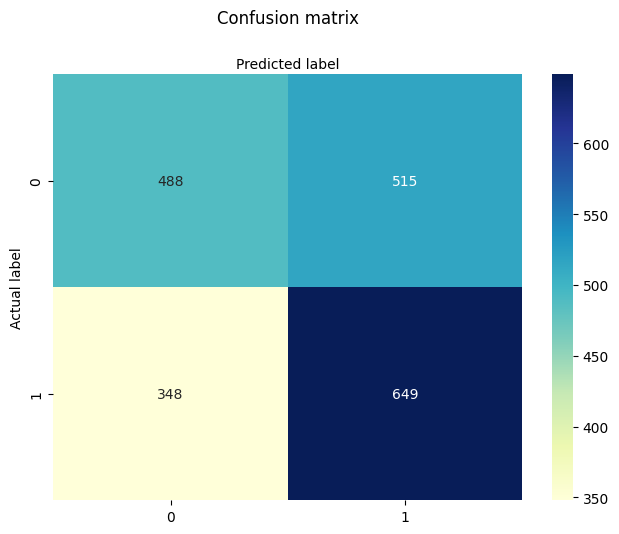

In [45]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classification1, y_pred))

              precision    recall  f1-score   support

     popular       0.58      0.49      0.53      1003
   unpopular       0.56      0.65      0.60       997

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



 accuracy                           0.57. It's not high but in other projects I have seen that is also less than 60%

**DECISION TREES**

In [47]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [48]:
model2 = DecisionTreeClassifier(random_state=1)
model2.fit(x_train_classification1, y_train_classification1)
y_pred2 = model2.predict(x_test_classification1)
print(classification_report(y_test_classification1, y_pred2))

              precision    recall  f1-score   support

     popular       0.54      0.51      0.52      1003
   unpopular       0.53      0.55      0.54       997

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000



accuracy 53%


**Tunning Hyperparameters**

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["gini", "entropy"]
}

dt=DecisionTreeClassifier(random_state=1)
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search1.fit(x_train_classification1, y_train_classification1)
score_df = pd.DataFrame(grid_search1.cv_results_)
score_df.head()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050022,0.001512,0.007932,0.000845,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.554375,0.558125,0.555000,0.573125,0.565000,0.561125,0.007087,7
1,0.066399,0.001244,0.007382,0.000118,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.561250,0.551250,0.569375,0.589375,0.550625,0.564375,0.014291,3
2,0.108281,0.008722,0.007591,0.000661,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.590625,0.562500,0.570625,0.603750,0.595000,0.584500,0.015459,1
3,0.186694,0.007081,0.007449,0.000116,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.554375,0.562500,0.551250,0.576875,0.563125,0.561625,0.008897,6
4,0.259864,0.010160,0.007535,0.000113,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.537500,0.548125,0.538125,0.560000,0.521250,0.541000,0.012825,10


In [51]:
grid_search1.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [52]:
results_DT1 = pd.DataFrame(grid_search1.cv_results_['params'])
results_DT1['test_score'] = grid_search1.cv_results_['mean_test_score']
results_DT1.columns

Index(['criterion', 'max_depth', 'test_score'], dtype='object')

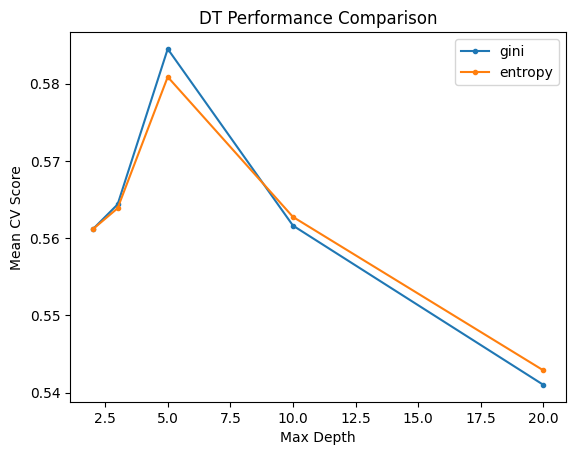

In [53]:
for criterion in ['gini', 'entropy']:
    temp = results_DT1[(results_DT1['criterion'] == criterion) ]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label=criterion)
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

In [54]:
model3 =DecisionTreeClassifier(random_state=1, max_depth=5, criterion='gini')
model3.fit(x_train_classification1, y_train_classification1)
y_pred3 = model3.predict(x_test_classification1)
print(classification_report(y_test_classification1, y_pred3))

              precision    recall  f1-score   support

     popular       0.58      0.56      0.57      1003
   unpopular       0.57      0.59      0.58       997

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.58      0.58      0.58      2000



Now, we get an accuracy of 58%

**RANDOM FOREST**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model4 = RandomForestClassifier(random_state=1)
model4.fit(x_train_classification1, y_train_classification1)
y_pred4 = model4.predict(x_test_classification1)
print(classification_report(y_test_classification1, y_pred4))

              precision    recall  f1-score   support

     popular       0.61      0.57      0.59      1003
   unpopular       0.59      0.63      0.61       997

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



accuracy 60%

**Tunning Hyperparameters**

In [57]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'criterion': ["gini", "entropy"]
}

rf=RandomForestClassifier(random_state=1)
# Instantiate the grid search model
grid_search2 = GridSearchCV(estimator=rf, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search2.fit(x_train_classification1, y_train_classification1)
score_df = pd.DataFrame(grid_search2.cv_results_)
score_df.head()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.806791,0.113612,0.049374,0.012927,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.582500,0.589375,0.581250,0.600625,0.592500,0.589250,0.007064,10
1,1.613971,0.283864,0.078964,0.006440,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.591875,0.588125,0.586875,0.615000,0.588750,0.594125,0.010567,8
2,2.419647,0.185855,0.080915,0.022031,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.610625,0.595625,0.602500,0.616250,0.603125,0.605625,0.007126,5
3,5.219777,1.341440,0.131745,0.051577,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.603125,0.603125,0.607500,0.613750,0.601250,0.605750,0.004497,4
4,6.366433,1.448428,0.125539,0.063031,gini,20,"{'criterion': 'gini', 'max_depth': 20}",0.587500,0.602500,0.608750,0.618125,0.613125,0.606000,0.010582,3


In [58]:
results_RF1 = pd.DataFrame(grid_search2.cv_results_['params'])
results_RF1['test_score'] = grid_search2.cv_results_['mean_test_score']
results_RF1.columns

Index(['criterion', 'max_depth', 'test_score'], dtype='object')

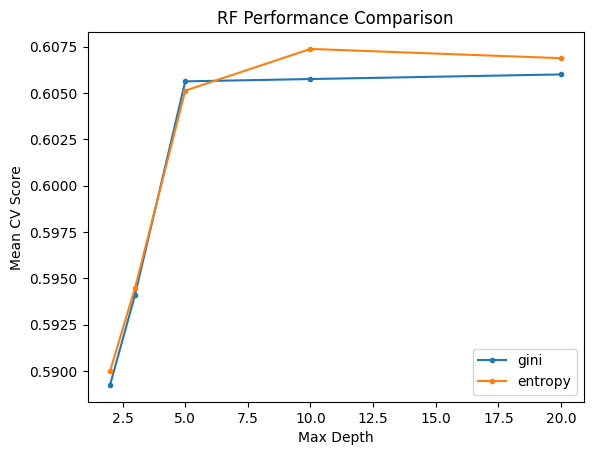

In [59]:
for criterion in ['gini', 'entropy']:
    temp = results_RF1[(results_RF1['criterion'] == criterion) ]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label=criterion)
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

In [60]:
grid_search2.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [61]:
model5 = RandomForestClassifier(random_state=1,max_depth=10, criterion='entropy')
model5.fit(x_train_classification1, y_train_classification1)
y_pred5 = model5.predict(x_test_classification1)
print(classification_report(y_test_classification1, y_pred5))

              precision    recall  f1-score   support

     popular       0.63      0.54      0.58      1003
   unpopular       0.59      0.68      0.63       997

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000



Now, we get an accuracy of 61%

**REGRESSION**

Now, we will treat the problem as a regression problem. First of all we prepare our input, we call it data_regression.

In [62]:
data_regression=data

In [63]:
data_regression.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_posit

In [64]:
data_regression=data_regression.drop([' n_non_stop_unique_tokens',' kw_max_max', ' self_reference_avg_sharess' ,' rate_positive_words',' n_non_stop_words',' kw_max_avg','popularity'], axis=1)


In [65]:
data_regression.columns

Index([' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_avg_max', ' kw_min_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_negative_words',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polari

In [66]:


random.seed(1)

# Get the total number of rows in the data
nrows =data_regression.shape[0]

# Calculate the number of rows for the training set
nrows_train = int(nrows * 0.8)

# Randomly sample the row indices for the training set
index_train = random.sample(range(nrows), nrows_train)

# Create the training and testing sets
train_regression = data_regression.iloc[index_train]
test_regression = data_regression.drop(index_train)

# Print the number of rows in the training set
print(train_regression.shape[0])
print(test_regression.shape[0])


8000
2000


In [67]:

x_train_regression=train_regression.drop(' shares', axis=1)
y_train_regression=train_regression[' shares']
x_test_regression=test_regression.drop(' shares', axis=1)
y_test_regression=test_regression[' shares']


In [68]:
print(x_train_regression.shape[1])

46


**SIMPLE REGRESSION**

<ipython-input-69-a6256cd763b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()[' shares'].drop(' shares')


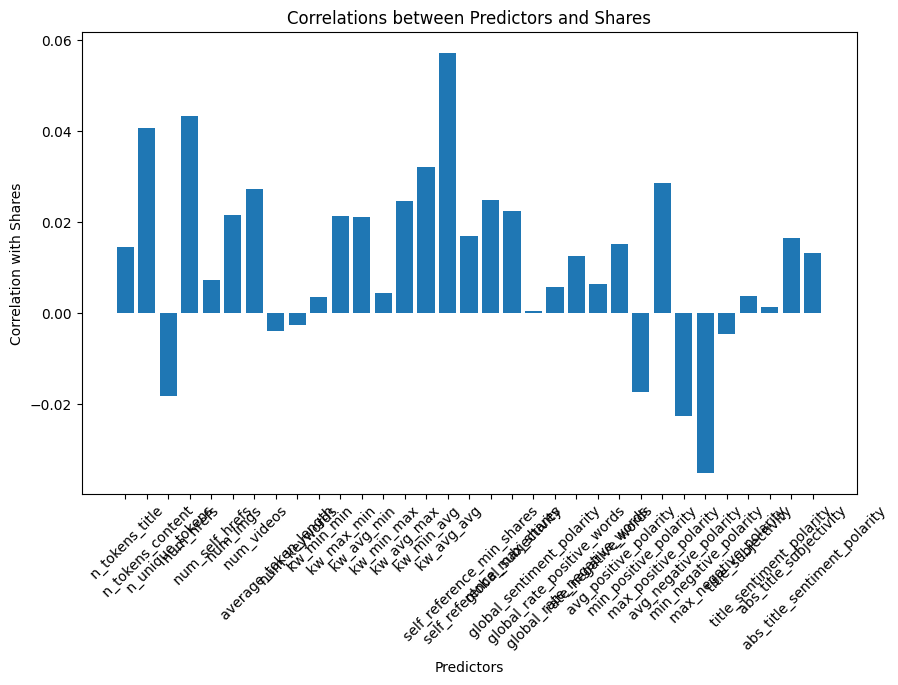

In [69]:
# Compute the correlations
train_df = pd.concat([x_train_regression, y_train_regression], axis=1)
corr = train_df.corr()[' shares'].drop(' shares')

# Plot the histogram
fig, ax = plt.subplots(figsize=(10,6))  # Adjust the figure size to make it wider
ax.bar(corr.index, corr.values)
ax.set_xlabel('Predictors')
ax.set_ylabel('Correlation with Shares')
ax.set_title('Correlations between Predictors and Shares')
ax.tick_params(axis='x', labelrotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()


In [70]:
max_corr_var = corr.idxmax()
max_corr_var

' kw_avg_avg'

In [71]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [72]:
x_train=x_train_regression[' kw_avg_avg']
y_train=y_train_regression
x_test=x_test_regression[' kw_avg_avg']
y_test=y_test_regression

In [74]:

model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=500, 
                    validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
Epoch 1/500
250/250 [==============================] - 4s 8ms/step - loss: 3358.4397 - mean_absolute_error: 3358.4397 - val_loss: 2685.5869 - val_mean_absolute_error: 2685.5869
Epoch 2/500
250/250 [==============================] - 1s 4ms/step - loss: 2768.6882 - mean_absolute_error: 2768.6882 - val_loss: 2243.7178 - val_mean_absolute_error: 2243.7178
Epoch 3/500
250/250 [===============

The results are not satisfactory, let's try multiple regression.

**MULTIPLE REGRESSION**

In [75]:
model = models.Sequential()
model.add(layers.Normalization(input_shape=(46,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 46)               3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 47        
                                                                 
Total params: 50
Trainable params: 47
Non-trainable params: 3
_________________________________________________________________


In [76]:
#  learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

In [77]:
history = model.fit(x_train_regression,y_train_regression, epochs=3500, 
                    validation_data=(x_test_regression, y_test_regression))

Se han truncado las últimas 5000 líneas del flujo de salida.
250/250 [==============================] - 1s 3ms/step - loss: 2384.8242 - mean_absolute_error: 2384.8242 - val_loss: 2028.4746 - val_mean_absolute_error: 2028.4746
Epoch 1002/3500
250/250 [==============================] - 1s 3ms/step - loss: 2386.8486 - mean_absolute_error: 2386.8486 - val_loss: 2045.7897 - val_mean_absolute_error: 2045.7897
Epoch 1003/3500
250/250 [==============================] - 1s 3ms/step - loss: 2393.6248 - mean_absolute_error: 2393.6248 - val_loss: 2025.8829 - val_mean_absolute_error: 2025.8829
Epoch 1004/3500
250/250 [==============================] - 1s 3ms/step - loss: 2387.9788 - mean_absolute_error: 2387.9788 - val_loss: 2044.5077 - val_mean_absolute_error: 2044.5077
Epoch 1005/3500
250/250 [==============================] - 1s 3ms/step - loss: 2387.8740 - mean_absolute_error: 2387.8740 - val_loss: 2038.5349 - val_mean_absolute_error: 2038.5349
Epoch 1006/3500
250/250 [=========================